Loading *watermark* extension and printing details about running platform.

In [66]:
%load_ext watermark
%watermark -v -n -m -p numpy,pandas,sklearn,tensorflow,keras

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Fri Apr 26 2019 

CPython 3.7.1
IPython 7.4.0

numpy 1.16.3
pandas 0.24.2
sklearn 0.20.3
tensorflow 1.13.1
keras 2.2.4

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


## Quick Exploration of Svebolle Deployment

In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/alk/Github/lora-time-series


In [68]:
DATASET_PATH = 'src/data/raw'

In [69]:
data_fname = os.path.join(PROJ_ROOT, DATASET_PATH, 'LORA_data.csv')
dframe = pd.read_csv(data_fname, header=0, sep=';')
dframe.head()

,Time,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,4/5,dataRate,crcStatus,mType,macPayload,_id
0,2017-01-02 12:08:27.788000,000013c1,868100000,0,125,7,-120,-1.0,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,c1130000804605039977d43d70b12724eea946c5a41f42...,586a34acb5866106ea976eb5
1,2017-01-02 12:08:29.196000,000013b8,868500000,2,125,7,-58,6.5,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,b813000000142b0352619fc9a89e0e561d060ca3ac29e5...,586a34aeb5866106ea976eb6
2,2017-01-02 12:08:44.520000,000013bf,868300000,1,125,7,"-118,8",-1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080ba30042ea26888992702442c832fc2c8ac91...,586a34bdb5866106ea976eb7
3,2017-01-02 12:08:55.347000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb8
4,2017-01-02 12:08:55.346000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb9


In [70]:
data = dframe.copy()

In [71]:
data = data[['Time', 'DevAddr']]
data.head()

,Time,DevAddr
0,2017-01-02 12:08:27.788000,000013c1
1,2017-01-02 12:08:29.196000,000013b8
2,2017-01-02 12:08:44.520000,000013bf
3,2017-01-02 12:08:55.347000,000013bf
4,2017-01-02 12:08:55.346000,000013bf


## Feature Engineering

In [72]:
def remove_ns(data):
    Time = list(data.Time.values)
    Time_parsed = []
    sep = '.'
    for t in Time:
        t_parsed = t.split(sep, 1)[0]
        Time_parsed.append(t_parsed)
    data.Time = Time_parsed
    data['Time'] = pd.to_datetime(data['Time'])
    return data
        
data = remove_ns(data)
data.head()

,Time,DevAddr
0,2017-01-02 12:08:27,000013c1
1,2017-01-02 12:08:29,000013b8
2,2017-01-02 12:08:44,000013bf
3,2017-01-02 12:08:55,000013bf
4,2017-01-02 12:08:55,000013bf


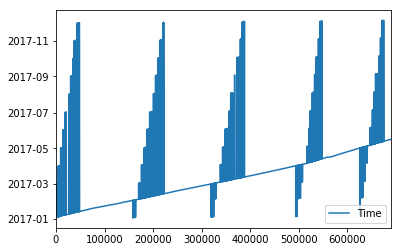

In [80]:
data.plot()

https://towardsdatascience.com/structure-and-automated-workflow-for-a-machine-learning-project-part-2-b5b420625102